Princpal Component Analysis (PCA)

Link - https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/

Dataset - Wine dataset

Types:
1. With using the Scikit-learn package

A) Step 1: Create or Read the Dataset

B) Step 2: Create two variables X, y with and without Response Varaible 
respectively

C) 


2. Without using the Scikit-learn Package (Numpy Library)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## PART A- Calculating the Principal Components using Scikit-Learn package

#### Step 1: Create or Read the Dataset

In [2]:
#Import the built-in dataset (Wine recognition) for this problem
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
np.set_printoptions(suppress=True, precision=8)

#### Step 2: Create two variables X, y with and without Response Varaible respectively

In [3]:
wine = load_wine()
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])
y = wine['target']

In [4]:
# X contains the whole Wine data without the "Target Variable"
print(X.sample(5))
print(X.shape)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
154    12.58        1.29  2.10               20.0      103.0           1.48   
98     12.37        1.07  2.10               18.5       88.0           3.52   
101    12.60        1.34  1.90               18.5       88.0           1.45   
148    13.32        3.24  2.38               21.5       92.0           1.93   
174    13.40        3.91  2.48               23.0      102.0           1.80   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
154        0.58                  0.53             1.40             7.60  0.58   
98         3.75                  0.24             1.95             4.50  1.04   
101        1.36                  0.29             1.35             2.45  1.04   
148        0.76                  0.45             1.25             8.42  0.55   
174        0.75                  0.43             1.41             7.30  0.70   

     od280/od315_of_diluted_wines  pro

In [5]:
# Y contains the response variables of the wine dataset
print(y)
print(y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178,)


In [6]:
# Check for any null values in "X"
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [7]:
# Selecting all rows, all columns and dropping all the null values (with axis = 0 i.e around rows)
t = X.iloc[:, :].dropna(axis=0)
t

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### Step 3: Create a function for PCA and transform all the values to compute the weight for each component

In [25]:
# Importing the PCA Function
pcs=PCA()
df_pca = pcs.fit_transform(X.iloc[:, :].dropna(axis=0))

In [27]:
df_pca = pd.DataFrame(df_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,318.562979,21.492131,3.130735,-0.250114,0.677078,0.568081,-0.619642,-0.199555,0.701280,-0.095008,0.088734,-0.038548,0.080264
1,303.097420,-5.364718,6.822835,-0.864035,-0.486096,0.014340,0.108865,0.604714,0.286717,-0.045782,0.039778,-0.057192,0.013593
2,438.061133,-6.537309,-1.113223,0.912411,0.380651,0.672404,0.785819,-0.500886,0.024547,-0.208960,0.237770,-0.048798,-0.035408
3,733.240139,0.192729,-0.917257,-0.541251,0.858662,0.599122,0.018770,0.190428,0.054277,0.531684,-0.096044,-0.166353,0.016344
4,-11.571428,18.489995,-0.554422,1.360896,0.276442,0.768884,-0.309976,0.119091,-0.195843,0.061771,0.316466,-0.007118,0.015278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,-3.155920,-2.348927,1.439001,-0.026425,0.043705,0.040167,0.087377,0.016509,0.098355,0.027251
174,3.131605,2.335191,-4.309931,-1.562181,-1.168003,0.128679,0.003859,-0.303185,-0.159759,0.159510,-0.048916,0.012626,-0.042645
175,88.458074,18.776285,-2.237577,-4.820708,-1.057336,0.215000,0.648489,0.068966,0.273675,-0.045336,-0.223049,0.096049,0.036175
176,93.456242,18.670819,-1.788392,-3.709352,-0.276956,-1.009229,0.414948,-0.145647,0.254468,0.059211,-0.030408,-0.052089,0.132759


The first column is the first PC and so on. This dataframe (df_pca) has the same dimensions as the original data X

In [34]:
# Calculate the loadings/weights/eiganvectors of the principal components
df_pca_loadings = pd.DataFrame(pcs.components_)
df_pca_loadings
# 13x13 matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.001659,-0.000681,0.000195,-0.004671,0.017868,0.000990,0.001567,-0.000123,0.000601,0.002327,0.000171,0.000705,0.999823
1,0.001203,0.002155,0.004594,0.026450,0.999344,0.000878,-0.000052,-0.001354,0.005004,0.015100,-0.000763,-0.003495,-0.017774
2,-0.016874,-0.122003,-0.051987,-0.938593,0.029780,0.040485,0.085443,-0.013511,0.024659,-0.291398,0.025978,0.070324,-0.004529
3,-0.141447,-0.160390,0.009773,0.330965,0.005394,0.074585,0.169087,-0.010806,0.050121,-0.878894,0.060035,0.178200,0.003113
4,0.020337,-0.612883,0.020176,0.064352,-0.006149,0.315245,0.524761,-0.029648,0.251183,0.331747,0.051524,0.260639,-0.002299
5,0.194120,0.742473,0.041753,-0.024065,-0.001924,0.278717,0.433598,-0.021953,0.241884,0.002740,-0.023776,0.288913,-0.001212
6,-0.923280,0.150110,-0.045010,-0.031527,-0.001797,0.020186,0.038869,0.004665,0.309799,0.112837,-0.030820,-0.101974,0.001076
7,-0.284821,0.064674,0.149340,-0.015154,0.003552,0.177238,0.248117,-0.006498,-0.870433,0.081287,0.002952,0.186715,-0.000010
8,-0.086601,-0.015662,-0.073650,-0.002045,0.001964,-0.255673,-0.378307,-0.036752,0.051520,0.099029,-0.033065,0.873747,0.000073
9,-0.002245,-0.018509,-0.086800,0.003554,-0.000041,0.847195,-0.520138,0.037713,0.009723,-0.023147,-0.038470,0.017017,0.000049


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

#### Step : Calculate the mean of the original datast (X)

In [35]:
# Original dataset
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [42]:
# Calulated Mean()
X_mean = X - X.mean()
X_mean.head()
# 178x13 matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.229382,-0.626348,0.063483,-3.894944,27.258427,0.504888,1.03073,-0.081854,0.699101,0.58191,0.082551,1.308315,318.106742
1,0.199382,-0.556348,-0.226517,-8.294944,0.258427,0.354888,0.73073,-0.101854,-0.310899,-0.67809,0.092551,0.788315,303.106742
2,0.159382,0.023652,0.303483,-0.894944,1.258427,0.504888,1.21073,-0.061854,1.219101,0.62191,0.072551,0.558315,438.106742
3,1.369382,-0.386348,0.133483,-2.694944,13.258427,1.554888,1.46073,-0.121854,0.589101,2.74191,-0.097449,0.838315,733.106742
4,0.239382,0.253652,0.503483,1.505056,18.258427,0.504888,0.66073,0.028146,0.229101,-0.73809,0.082551,0.318315,-11.893258


In [38]:
df_pca_loadings.loc[0, :]

0     0.001659
1    -0.000681
2     0.000195
3    -0.004671
4     0.017868
5     0.000990
6     0.001567
7    -0.000123
8     0.000601
9     0.002327
10    0.000171
11    0.000705
12    0.999823
Name: 0, dtype: float64

In [39]:
X_mean.loc[1, :]

alcohol                           0.199382
malic_acid                       -0.556348
ash                              -0.226517
alcalinity_of_ash                -8.294944
magnesium                         0.258427
total_phenols                     0.354888
flavanoids                        0.730730
nonflavanoid_phenols             -0.101854
proanthocyanins                  -0.310899
color_intensity                  -0.678090
hue                               0.092551
od280/od315_of_diluted_wines      0.788315
proline                         303.106742
Name: 1, dtype: float64

In [37]:
# Calulating the componenets ((weight)(Mean of columns) = PC components) for 1st row, 1st Columns
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[1, :])  

# CALCULATED ROWV-WISE

303.0974196593864

In [47]:
# Calculating the PCA for whole data
pca_mat = np.dot(X_mean, df_pca_loadings)
pca_mat = pd.DataFrame(pca_mat)
pca_mat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.745761,-19.030687,-54.978192,0.960076,-0.065187,0.282167,35.404206,306.873201,1.599379,11.199144,-50.613094,21.139690,1.177193
1,3.053705,-1.728314,-52.679231,-1.976298,0.084230,-9.032524,20.395264,293.145074,-5.314370,6.128741,-50.189595,11.707935,0.195038
2,2.546005,-4.965696,-76.282796,0.299071,1.022956,-10.979080,30.462179,423.454027,-6.810886,-0.646687,-72.510027,20.645993,0.168507
3,5.455720,-14.477573,-127.601511,1.177868,1.216902,-12.966628,56.571811,708.317012,-8.740403,3.526248,-120.973183,36.230638,1.362931
4,-0.489300,-10.855377,2.503262,1.143909,0.139795,5.683552,9.577318,-12.040217,5.198791,4.780385,3.331983,4.813579,0.194864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.914193,2.066345,0.806305,0.099807,3.349036,0.966896,-4.170929,-6.604937,-1.759626,-2.700522,0.057290,-1.808130,0.663231
174,0.672288,-2.650206,-0.699281,1.312134,1.598424,2.684325,0.732814,2.783215,0.115143,-2.614519,-1.268778,1.213949,0.376147
175,2.164086,-14.331009,-15.473918,1.882512,2.027232,8.268995,14.003671,84.528087,2.926914,5.589868,-14.797752,9.049576,0.193315
176,2.183980,-14.335199,-16.266324,1.738459,0.351769,7.382375,14.834361,89.332080,2.754948,5.550710,-15.536705,9.402915,0.122924


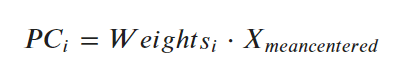

-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

#### Step 5: Calculate the explained variance, proportion variance, and cummulative proportion of variance

In [69]:
# Calculating explained variance, proportion variance, and cummulative proportion of variance

pcs_df = pd.DataFrame({'Explained_Variance': np.sqrt(pcs.explained_variance_),
                       'Proportion of variance': pcs.explained_variance_ratio_,
                       'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcs_df

,Explained_Variance,Proportion of variance,Cumulative proportion
0,314.963156,9.980912e-01,0.998091
1,13.135268,1.735916e-03,0.999827
2,3.072151,9.495896e-05,0.999922
3,2.234095,5.021736e-05,0.999972
4,1.108533,1.236368e-05,0.999985
5,0.917095,8.462130e-06,0.999993
6,0.528179,2.806815e-06,0.999996
7,0.389077,1.523081e-06,0.999997
8,0.334809,1.127830e-06,0.999999
9,0.267773,7.214158e-07,0.999999


In [63]:
pcs.explained_variance_ratio_

array([0.99809123, 0.00173592, 0.00009496, 0.00005022, 0.00001236,
       0.00000846, 0.00000281, 0.00000152, 0.00000113, 0.00000072,
       0.00000038, 0.00000021, 0.00000008])

#### Step 6: Plotting the cummulative proportion of variance


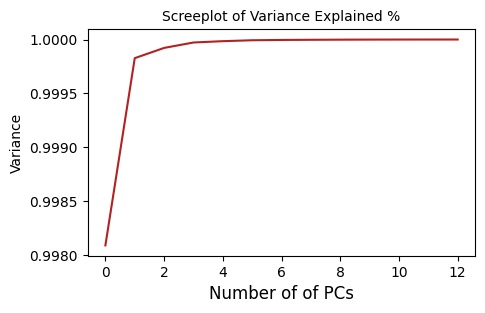

In [62]:
# Plotting variance
Cum_var = np.cumsum(pcs.explained_variance_ratio_)

fig, axes = plt.subplots(1,1,figsize=(5,3), dpi=100)
plt.plot(Cum_var, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=10)
plt.xlabel('Number of of PCs', fontsize=12)
plt.ylabel("Variance", fontsize = 10)
plt.show()


## PART B - Steps to Compute Principal Components from Scratch

In [91]:
#Import the built-in dataset (Wine recognition) for this problem
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine


#### Step 2: Create two variables X, y with and without Response Varaible respectively

In [92]:
wine = load_wine()
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])
y = wine['target']


In [93]:
# X contains the whole Wine data without the "Target Variable"
print(X.sample(5))
print(X.shape)

     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
124    11.87        4.31  2.39  ...  0.75                          3.64    380.0
30     13.73        1.50  2.70  ...  1.19                          2.71   1285.0
172    14.16        2.51  2.48  ...  0.62                          1.71    660.0
24     13.50        1.81  2.61  ...  1.12                          3.82    845.0
127    11.79        2.13  2.78  ...  0.97                          2.44    466.0

[5 rows x 13 columns]
(178, 13)


In [94]:
print(y)
print(y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178,)


#### Step 1: Standardize each column


In [99]:
# Calculate the mean of the dataset / Standardize each column

X_standard = X - X.mean()
X_standard

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.229382,-0.626348,0.063483,-3.894944,27.258427,0.504888,1.03073,-0.081854,0.699101,0.58191,0.082551,1.308315,318.106742
1,0.199382,-0.556348,-0.226517,-8.294944,0.258427,0.354888,0.73073,-0.101854,-0.310899,-0.67809,0.092551,0.788315,303.106742
2,0.159382,0.023652,0.303483,-0.894944,1.258427,0.504888,1.21073,-0.061854,1.219101,0.62191,0.072551,0.558315,438.106742
3,1.369382,-0.386348,0.133483,-2.694944,13.258427,1.554888,1.46073,-0.121854,0.589101,2.74191,-0.097449,0.838315,733.106742
4,0.239382,0.253652,0.503483,1.505056,18.258427,0.504888,0.66073,0.028146,0.229101,-0.73809,0.082551,0.318315,-11.893258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.709382,3.313652,0.083483,1.005056,-4.741573,-0.615112,-1.41927,0.158146,-0.530899,2.64191,-0.317449,-0.871685,-6.893258
174,0.399382,1.573652,0.113483,3.505056,2.258427,-0.495112,-1.27927,0.068146,-0.180899,2.24191,-0.257449,-1.051685,3.106742
175,0.269382,1.943652,-0.106517,0.505056,20.258427,-0.705112,-1.33927,0.068146,-0.240899,5.14191,-0.367449,-1.051685,88.106742
176,0.169382,0.253652,0.003483,0.505056,20.258427,-0.645112,-1.34927,0.168146,-0.130899,4.24191,-0.357449,-0.991685,93.106742


#### Step 2: Compute Covariance Matrix


In [102]:
df_cov = X_standard.cov()
print(df_cov.shape)
df_cov

(13, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185
malic_acid,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867
ash,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739
alcalinity_of_ash,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345
magnesium,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700
total_phenols,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057
flavanoids,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492
nonflavanoid_phenols,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586
proanthocyanins,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334
color_intensity,1.028283,0.644838,0.164654,0.145024,6.620521,-0.079998,-0.399169,0.040121,-0.033504,5.374449,-0.276506,-0.705813,230.767480


#### Step 3: Compute Eigen values and Eigen Vectors

In [104]:
from numpy.linalg import eig
eigvalues, eigvectors = eig(df_cov)
print(eigvalues)
print(eigvectors.shape)

[99201.78951748   172.53526648     9.4381137      4.99117861
     1.22884523     0.84106387     0.27897352     0.15138127
     0.11209676     0.0082037      0.02107237     0.03757598
     0.0717026 ]
(13, 13)


#### Step 4: Derive Principal Component Features by taking dot product of eigen vector and standardized columns

In [110]:
X_pca = np.dot(X_standard, eigvectors)
df_pca_calc = pd.DataFrame(X_pca) 
df_pca_calc

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-318.562979,-21.492131,-3.130735,0.250114,-0.677078,0.568081,-0.619642,0.199555,-0.701280,0.080264,0.038548,0.088734,-0.095008
1,-303.097420,5.364718,-6.822835,0.864035,0.486096,0.014340,0.108865,-0.604714,-0.286717,0.013593,0.057192,0.039778,-0.045782
2,-438.061133,6.537309,1.113223,-0.912411,-0.380651,0.672404,0.785819,0.500886,-0.024547,-0.035408,0.048798,0.237770,-0.208960
3,-733.240139,-0.192729,0.917257,0.541251,-0.858662,0.599122,0.018770,-0.190428,-0.054277,0.016344,0.166353,-0.096044,0.531684
4,11.571428,-18.489995,0.554422,-1.360896,-0.276442,0.768884,-0.309976,-0.119091,0.195843,0.015278,0.007118,0.316466,0.061771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,6.980211,4.541137,2.474707,3.155920,2.348927,1.439001,-0.026425,-0.043705,-0.040167,0.027251,-0.098355,0.016509,0.087377
174,-3.131605,-2.335191,4.309931,1.562181,1.168003,0.128679,0.003859,0.303185,0.159759,-0.042645,-0.012626,-0.048916,0.159510
175,-88.458074,-18.776285,2.237577,4.820708,1.057336,0.215000,0.648489,-0.068966,-0.273675,0.036175,-0.096049,-0.223049,-0.045336
176,-93.456242,-18.670819,1.788392,3.709352,0.276956,-1.009229,0.414948,0.145647,-0.254468,0.132759,0.052089,-0.030408,0.059211


In [108]:
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,318.562979,21.492131,3.130735,-0.250114,0.677078,0.568081,-0.619642,-0.199555,0.701280,-0.095008,0.088734,-0.038548,0.080264
1,303.097420,-5.364718,6.822835,-0.864035,-0.486096,0.014340,0.108865,0.604714,0.286717,-0.045782,0.039778,-0.057192,0.013593
2,438.061133,-6.537309,-1.113223,0.912411,0.380651,0.672404,0.785819,-0.500886,0.024547,-0.208960,0.237770,-0.048798,-0.035408
3,733.240139,0.192729,-0.917257,-0.541251,0.858662,0.599122,0.018770,0.190428,0.054277,0.531684,-0.096044,-0.166353,0.016344
4,-11.571428,18.489995,-0.554422,1.360896,0.276442,0.768884,-0.309976,0.119091,-0.195843,0.061771,0.316466,-0.007118,0.015278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,-3.155920,-2.348927,1.439001,-0.026425,0.043705,0.040167,0.087377,0.016509,0.098355,0.027251
174,3.131605,2.335191,-4.309931,-1.562181,-1.168003,0.128679,0.003859,-0.303185,-0.159759,0.159510,-0.048916,0.012626,-0.042645
175,88.458074,18.776285,-2.237577,-4.820708,-1.057336,0.215000,0.648489,0.068966,0.273675,-0.045336,-0.223049,0.096049,0.036175
176,93.456242,18.670819,-1.788392,-3.709352,-0.276956,-1.009229,0.414948,-0.145647,0.254468,0.059211,-0.030408,-0.052089,0.132759
